## *Data: Feature extraction, and visualization*

In [417]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.linalg import svd

In [418]:
df=pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,NaN,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,1401,4,118,2022-09-11,0.87,1,42,5,NaN
1,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,NaN,Nrrebro,55.69388,12.54725,Entire home/apt,793,5,92,2023-03-22,0.69,1,5,4,NaN
2,338992,Rental unit in Copenhagen · ★4.58 · 2 bedrooms...,799887,Bente,NaN,Vesterbro-Kongens Enghave,55.67365,12.55581,Private room,1000,1,378,2022-09-26,2.75,3,0,2,NaN
3,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,NaN,Nrrebro,55.68641,12.54741,Entire home/apt,803,3,173,2023-01-02,1.03,1,0,1,NaN
4,339126,Rental unit in Copenhagen · ★4.88 · 2 bedrooms...,1589153,Michael & Bille Max,NaN,Vesterbro-Kongens Enghave,55.67284,12.54717,Entire home/apt,2400,2,77,2023-06-19,0.57,1,128,14,NaN


In [419]:
df.shape

(17027, 18)

In [420]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [421]:
df=df.drop(columns=['neighbourhood_group','license','id','host_id','host_name','calculated_host_listings_count','last_review', 'reviews_per_month', 'number_of_reviews_ltm'])    #drop non-desired columns

Here we perform data parsing for column 'name', transforming it into 'type,rating,bed,bedroom,bath' columns. Also, we make sure that datatypes for newly created columns are correct.

In [422]:
#extract the information/datatype from the 'name' column
#type_of = df['name'].str.extract(r'^(.*?)\s*[\d.]+')
#extract the rating and convert to numeric
rating_format1 = df['name'].str.extract(r'(\d+\.\d+)')  #rating format "x.x"
rating_format2 = df['name'].str.extract(r'(\d+\.\d+)\/')  #rating format "x.x/"
df['rating'] = pd.to_numeric(rating_format1.fillna(rating_format2)[0], errors='coerce')
#extract the num of bed,bedrooms, baths
df['bedroom'] = df['name'].str.extract(r'(\d+)\s+bedroom')  # Extracts the number of bedrooms
df['bed'] = df['name'].str.extract(r'(\d+)\s+bed')  # Extracts the number of beds
df['bath'] = df['name'].str.extract(r'(\d+)\s+bath')  # Extracts the number of baths
#convert the columns to the appropriate data types (int - since it's num of bed,bedrooms, baths)
df['bedroom'] = pd.to_numeric(df['bedroom'], errors='coerce')
df['bed'] = pd.to_numeric(df['bed'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')
#drop 'name' column
df.drop(columns=['name'], inplace=True)

In [423]:
#If we're missing values in one of these 9 filtered columns, we remove that row..
if df['price'].isna().any():
    print(f"Column has missing values.")
else:
    print(f"Column has no missing values.")

Column has no missing values.


In [424]:
df = df.fillna(0) # swap NaN for 0

In [425]:
# Our dataset looks like this now;
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bed,bath
0,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,1401,4,118,42,4.88,1.0,1.0,1.0
1,Nrrebro,55.69388,12.54725,Entire home/apt,793,5,92,5,4.91,1.0,1.0,1.0
2,Vesterbro-Kongens Enghave,55.67365,12.55581,Private room,1000,1,378,0,4.58,2.0,2.0,0.0
3,Nrrebro,55.68641,12.54741,Entire home/apt,803,3,173,0,4.78,1.0,1.0,1.0
4,Vesterbro-Kongens Enghave,55.67284,12.54717,Entire home/apt,2400,2,77,128,4.88,2.0,2.0,5.0


In [426]:
df = df.drop(columns='bed')

In [427]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bath
count,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000
mean,55.680244,12.558654,1261.054149,4.506196,17.445175,85.985083,3.310620,1.618077,1.239619
std,0.019229,0.031353,1868.683966,15.433537,39.016123,115.196636,2.209342,0.924221,1.101838
min,55.615990,12.455520,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.666210,12.540870,799.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,55.681488,12.555340,1000.000000,3.000000,6.000000,18.000000,4.740000,1.000000,1.000000
75%,55.695440,12.580615,1401.000000,4.000000,18.000000,160.000000,4.930000,2.000000,1.000000
max,55.732470,12.639720,150364.000000,1111.000000,1178.000000,365.000000,5.000000,15.000000,5.000000


Pearson correlation heatmap, to investigate the connection of price with other attributes:

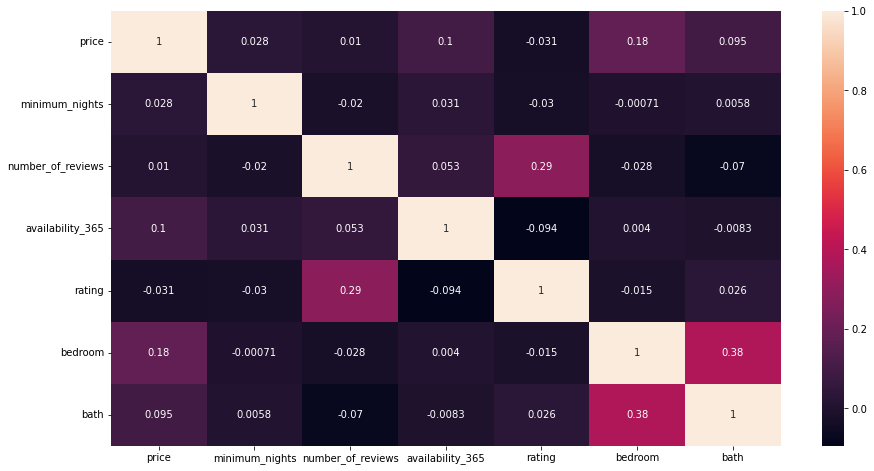

In [428]:
df_cor=df[['price','minimum_nights','number_of_reviews','availability_365','rating','bedroom','bath']]
plt.figure(figsize=(15,8))
sb.heatmap(df_cor.corr(method="pearson"), annot=True, annot_kws={"size":10})
plt.show()

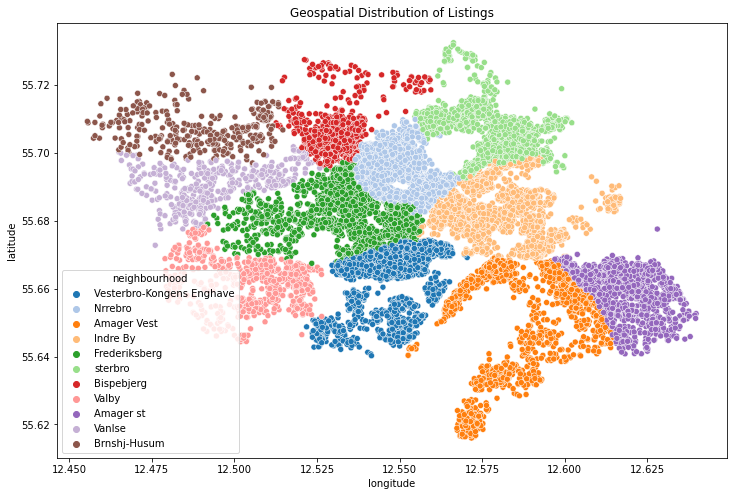

In [429]:
# Scatterplot for Geospatial Data
plt.figure(figsize=(12, 8))
sb.scatterplot(x='longitude', y='latitude', data=df, hue='neighbourhood', palette='tab20')
plt.title('Geospatial Distribution of Listings')
plt.show()

In [430]:
# use the describe function to get the summary statistics of the data and detect outliers
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bath
count,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000,17027.000000
mean,55.680244,12.558654,1261.054149,4.506196,17.445175,85.985083,3.310620,1.618077,1.239619
std,0.019229,0.031353,1868.683966,15.433537,39.016123,115.196636,2.209342,0.924221,1.101838
min,55.615990,12.455520,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.666210,12.540870,799.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,55.681488,12.555340,1000.000000,3.000000,6.000000,18.000000,4.740000,1.000000,1.000000
75%,55.695440,12.580615,1401.000000,4.000000,18.000000,160.000000,4.930000,2.000000,1.000000
max,55.732470,12.639720,150364.000000,1111.000000,1178.000000,365.000000,5.000000,15.000000,5.000000


<Axes: xlabel='price'>

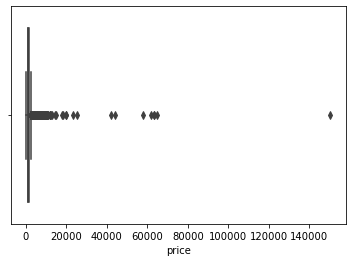

In [431]:
# Plot the distribution of the price
sb.boxplot(x=df['price'])

Now we see that there are still some values way higher than the normal, but it's not as dramatic as before

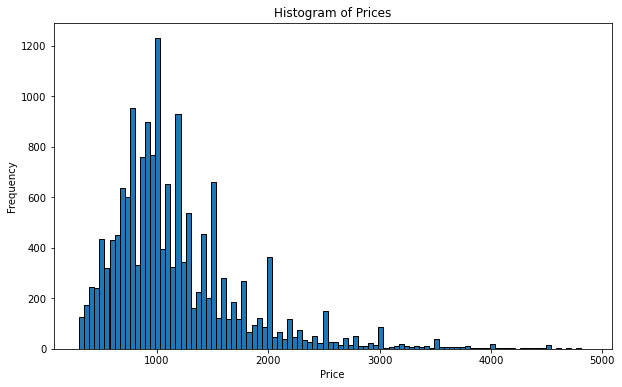

In [432]:
df = df[(df['price'] >= df['price'].quantile(0.01)) & (df['price'] <= df['price'].quantile(0.99))]
df = df[(df['minimum_nights'] >= df['minimum_nights'].quantile(0.01)) & (df['minimum_nights'] <= df['minimum_nights'].quantile(0.99))]

# histogram of the price
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=100, orientation='vertical', edgecolor='k')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Histogram of Prices')
plt.show()

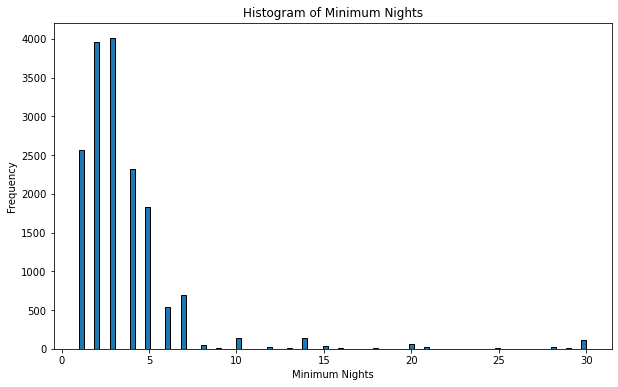

In [433]:
# histogram of the minimum nights
plt.figure(figsize=(10, 6))
plt.hist(df['minimum_nights'], bins=100, orientation='vertical', edgecolor='k')
plt.ylabel('Frequency')
plt.xlabel('Minimum Nights')
plt.title('Histogram of Minimum Nights')
plt.show()


In [434]:
df.describe().applymap("{0:.2f}".format)

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bath
count,16584.00,16584.00,16584.00,16584.00,16584.00,16584.00,16584.00,16584.00,16584.00
mean,55.68,12.56,1178.02,3.64,17.42,85.24,3.33,1.62,1.25
std,0.02,0.03,608.77,3.48,38.57,114.67,2.20,0.92,1.10
min,55.62,12.46,300.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,55.67,12.54,800.00,2.00,2.00,0.00,0.00,1.00,1.00
50%,55.68,12.56,1000.00,3.00,6.00,18.00,4.75,1.00,1.00
75%,55.70,12.58,1400.00,4.00,18.00,157.00,4.93,2.00,1.00
max,55.73,12.64,4857.00,30.00,1178.00,365.00,5.00,15.00,5.00


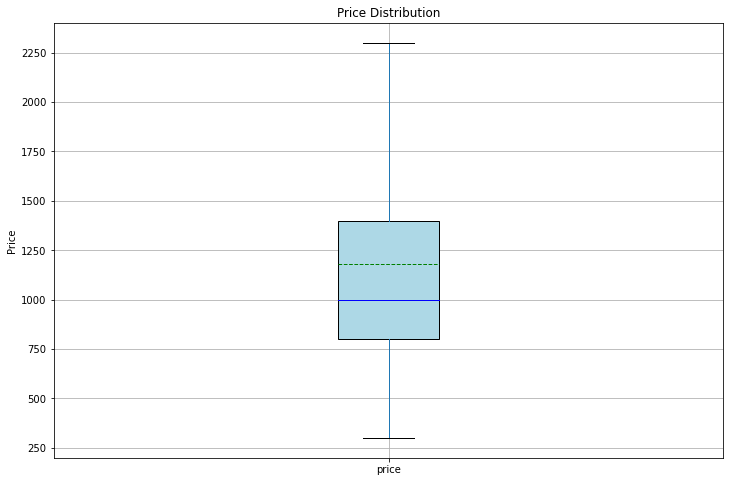

In [435]:
# create a box plot for 'price'
plt.figure(figsize=(12, 8))
df.boxplot(column='price', showfliers=False, showmeans=True, patch_artist=True, boxprops = dict(facecolor = "lightblue"),meanline = True, meanprops = dict(color = "green", linewidth=1), medianprops = dict(color = "blue", linewidth = 1))
plt.title('Price Distribution')
plt.ylabel('Price')
plt.suptitle('')
plt.show()

<Figure size 864x576 with 0 Axes>

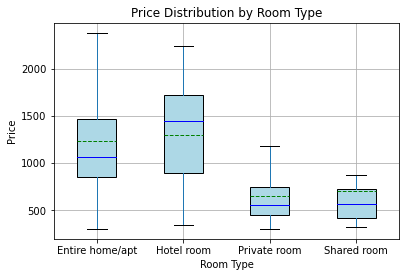

In [436]:
# Create a box plot for 'price' grouped by 'room_type' without using seabon
plt.figure(figsize=(12, 8))
df.boxplot(column='price', by='room_type', showfliers=False, showmeans=True, patch_artist=True, boxprops = dict(facecolor = "lightblue"),meanline = True, meanprops = dict(color = "green", linewidth=1), medianprops = dict(color = "blue", linewidth = 1))
plt.title('Price Distribution by Room Type')
plt.ylabel('Price')
plt.xlabel('Room Type')
plt.suptitle('') 
plt.show()

In [437]:
df['room_type'].head()

0    Entire home/apt
1    Entire home/apt
2       Private room
3    Entire home/apt
4    Entire home/apt
Name: room_type, dtype: object

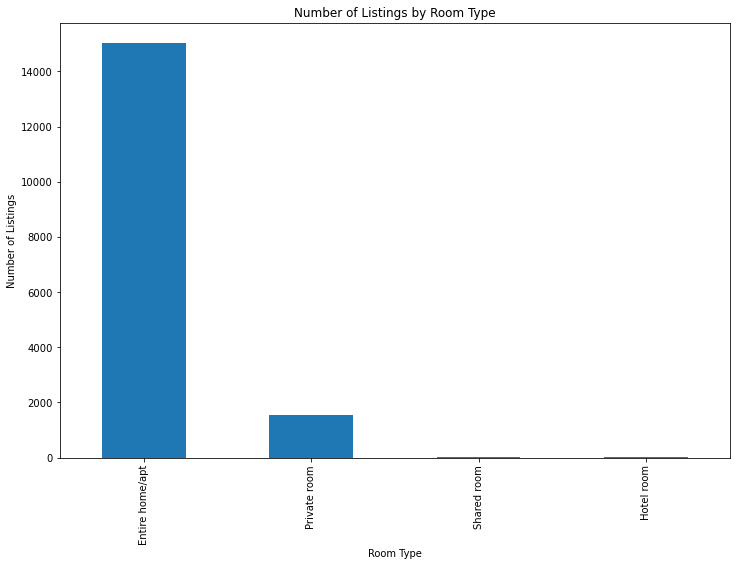

In [438]:
# Create a bar chart to show the count of listings in each 'neighbourhood' to identify the most popular neighborhoods.
plt.figure(figsize=(12, 8))
df['room_type'].value_counts().plot(kind='bar')
plt.title('Number of Listings by Room Type')
plt.ylabel('Number of Listings')
plt.xlabel('Room Type')
plt.show()

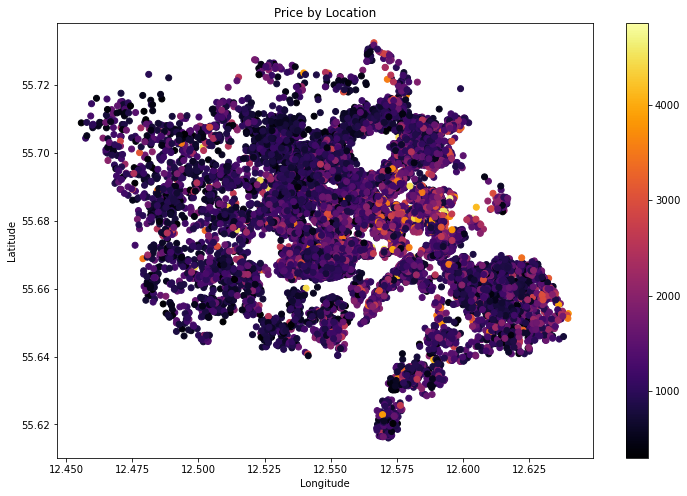

In [439]:
# create a heatmap of the price by location
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap="inferno")
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price by Location')
plt.show()

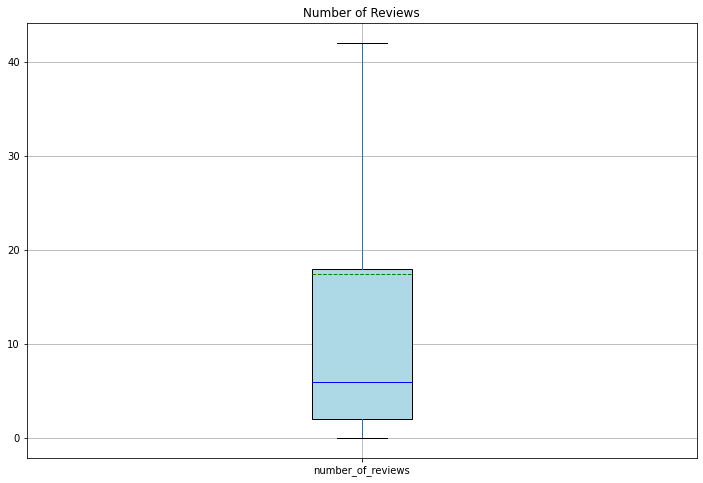

In [440]:
# plot the boxplot for number of reviews
plt.figure(figsize=(12, 8))
df.boxplot(column='number_of_reviews', showfliers=False, showmeans=True, patch_artist=True, boxprops = dict(facecolor = "lightblue"),meanline = True, meanprops = dict(color = "green", linewidth=1), medianprops = dict(color = "blue", linewidth = 1))
plt.title('Number of Reviews')
plt.ylabel('')
plt.xlabel('')
plt.suptitle('') 
plt.show()

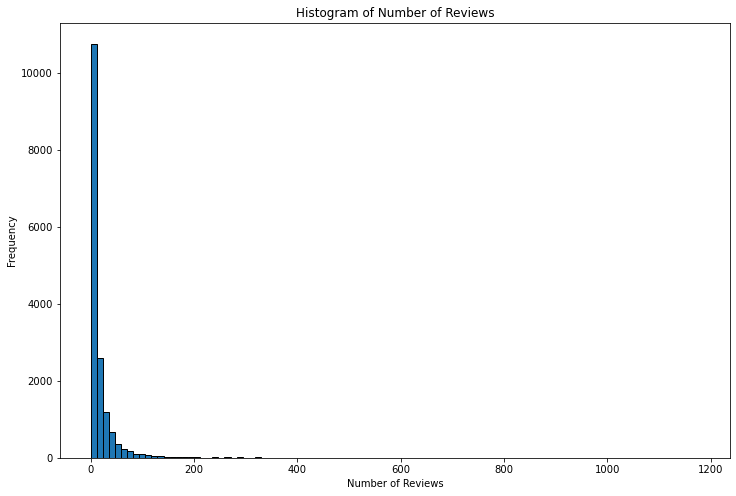

In [441]:
# create number of reviews histogram
plt.figure(figsize=(12, 8))
plt.hist(df['number_of_reviews'], bins=100, orientation='vertical', edgecolor='k')
plt.ylabel('Frequency')
plt.xlabel('Number of Reviews')
plt.title('Histogram of Number of Reviews')
plt.show()

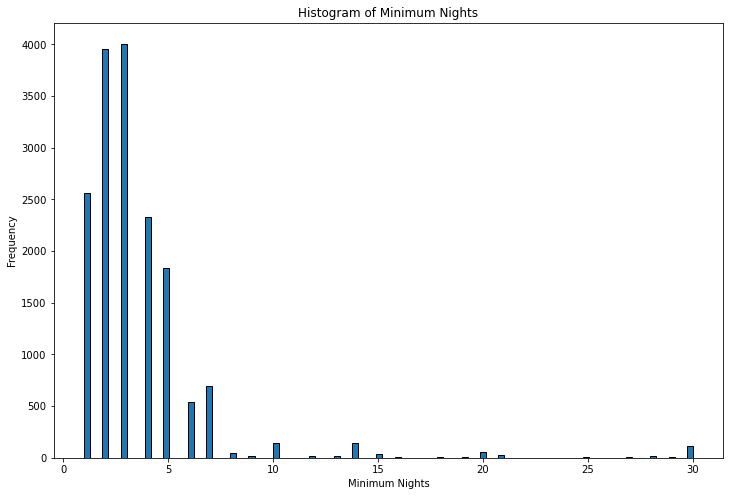

In [442]:
# plot distribution histogram of the minimum nights
plt.figure(figsize=(12, 8))
plt.hist(df['minimum_nights'], bins=100, orientation='vertical', edgecolor='k')
plt.ylabel('Frequency')
plt.xlabel('Minimum Nights')
plt.title('Histogram of Minimum Nights')
plt.show()


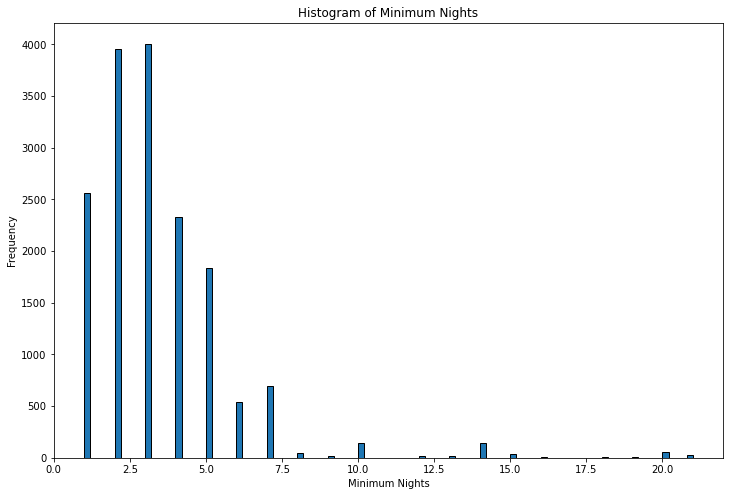

In [443]:
# filter minimum nights and plot histogram
df_mn = df[(df['minimum_nights'] >= df['minimum_nights'].quantile(0.01)) & (df['minimum_nights'] <= df['minimum_nights'].quantile(0.99))]
plt.figure(figsize=(12, 8))
plt.hist(df_mn['minimum_nights'], bins=100, orientation='vertical', edgecolor='k')
plt.ylabel('Frequency')
plt.xlabel('Minimum Nights')
plt.title('Histogram of Minimum Nights')
plt.show()

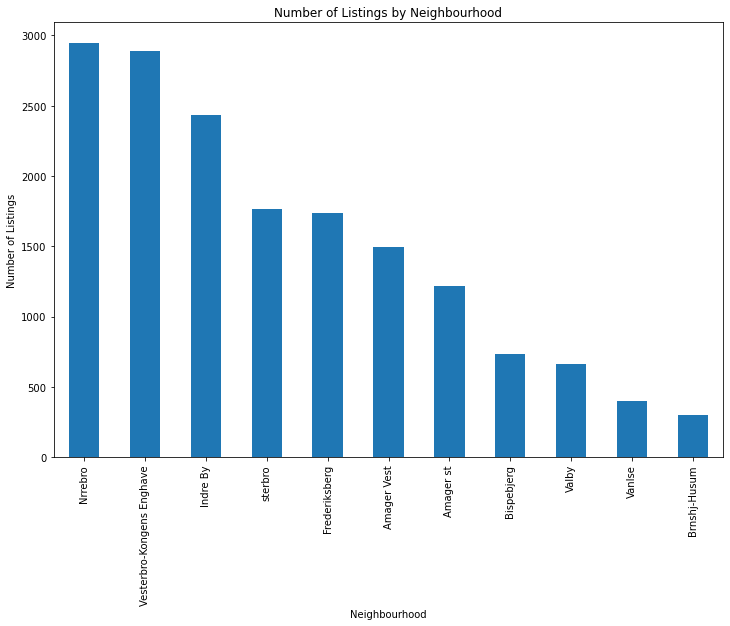

In [444]:
# Bar chart with count of listings in each 'neighbourhood'
plt.figure(figsize=(12, 8))
df['neighbourhood'].value_counts().plot(kind='bar')
plt.title('Number of Listings by Neighbourhood')
plt.ylabel('Number of Listings')
plt.xlabel('Neighbourhood')
plt.show()


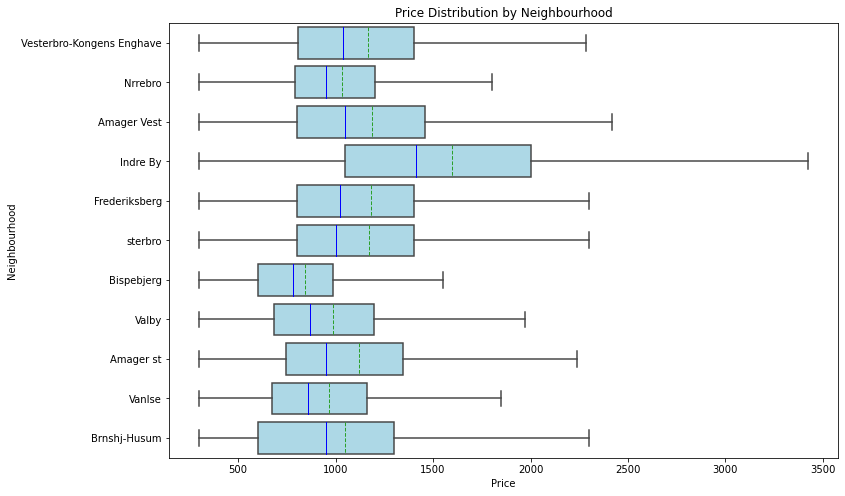

In [445]:
# Create a box plot for 'price' grouped by 'room_type'
fig, ax = plt.subplots(figsize=(12, 8))
sb.boxplot(y='neighbourhood', x='price', orient='h', data=df, width=0.8,showfliers=False, showmeans=True, meanline = True, boxprops = dict(facecolor = "lightblue"), medianprops = dict(color = "blue", linewidth = 1), ax=ax)
plt.title('Price Distribution by Neighbourhood')
plt.ylabel('Neighbourhood')
plt.xlabel('Price')
plt.suptitle('')
plt.show()

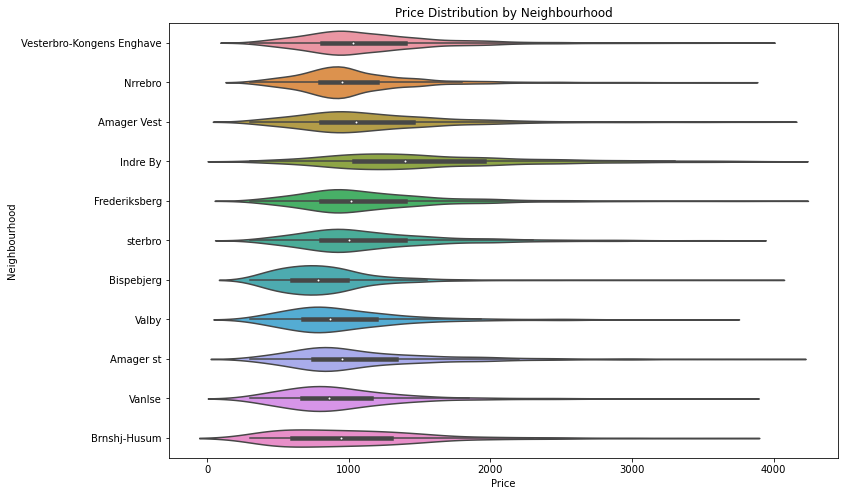

In [446]:
# create a violin plot of the price distribution by neighbourhood
df_clone = df[df['price'] < 4000]
plt.figure(figsize=(12, 8))
sb.violinplot(y='neighbourhood', x='price', data=df_clone, width=0.8,showextrema = False, showmeans=False, meanline = False, showflyers=False)
plt.title('Price Distribution by Neighbourhood')
plt.ylabel('Neighbourhood')
plt.xlabel('Price')
plt.show()

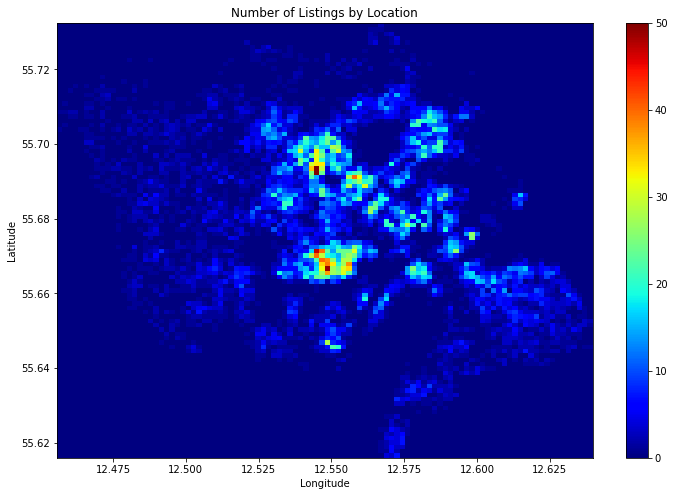

In [447]:
# create heatmap of number of entries by latitude and longitude intervals
plt.figure(figsize=(12, 8))
plt.hist2d(df['longitude'], df['latitude'], bins=100, cmap='jet')
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Number of Listings by Location')
plt.show()


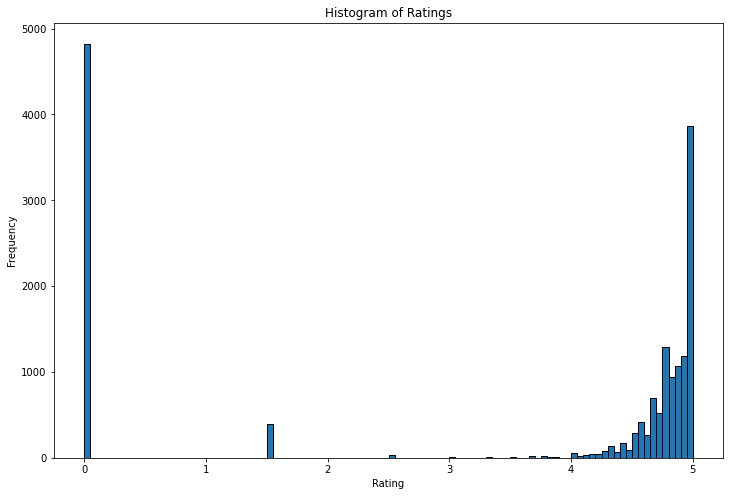

In [448]:
#plot ratings distribution
plt.figure(figsize=(12, 8))
plt.hist(df['rating'], bins=100, orientation='vertical', edgecolor='k')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('Histogram of Ratings')
plt.show()

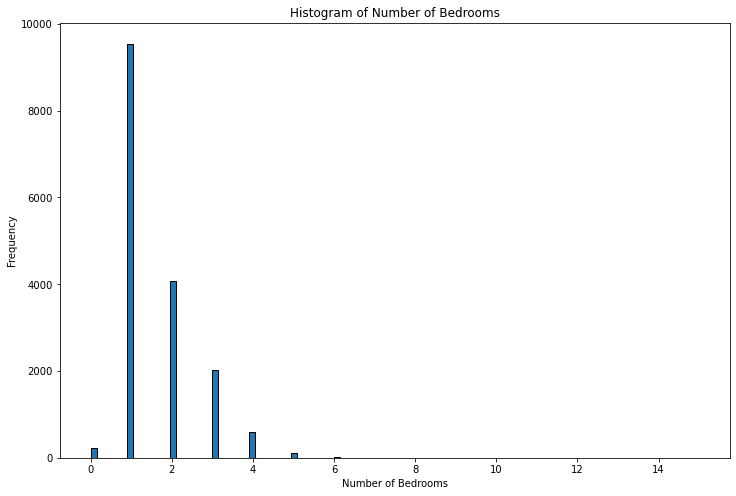

In [449]:
# plot bedrooms histogram
plt.figure(figsize=(12, 8))
plt.hist(df['bedroom'], bins=100, orientation='vertical', edgecolor='k')
plt.ylabel('Frequency')
plt.xlabel('Number of Bedrooms')
plt.title('Histogram of Number of Bedrooms')
plt.show()


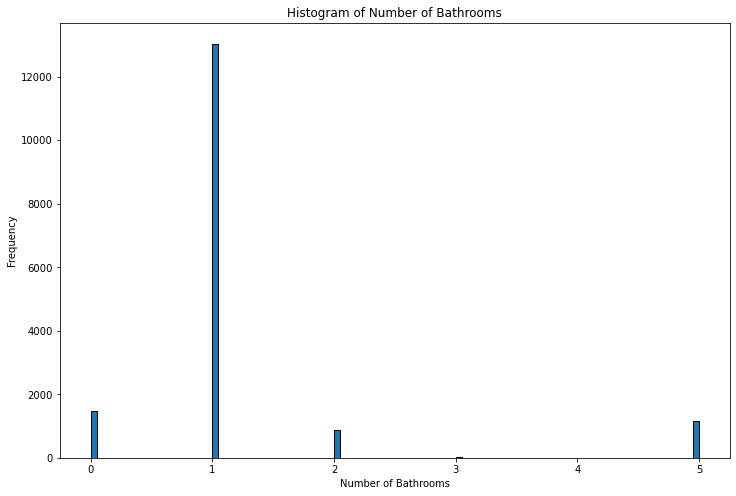

In [450]:
# plot bathrooms histogram
plt.figure(figsize=(12, 8))
plt.hist(df['bath'], bins=100, orientation='vertical', edgecolor='k')
plt.ylabel('Frequency')
plt.xlabel('Number of Bathrooms')
plt.title('Histogram of Number of Bathrooms')
plt.show()


# Data Standardization

In [451]:
classLabels = df['neighbourhood']
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(len(classNames))))

# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

df = df.drop(columns=['neighbourhood'])

In [452]:
# standardize the 'latitude' and 'longitude' columns
df['latitude'] = (df['latitude'] - df['latitude'].mean()) / df['latitude'].std()
df['longitude'] = (df['longitude'] - df['longitude'].mean()) / df['longitude'].std()

In [453]:
# standardize the 'rating' column
df['rating'] = (df['rating'] - df['rating'].mean()) / df['rating'].std()

In [454]:
# standardize price
df['price'] = (df['price'] - df['price'].mean()) / df['price'].std()

In [455]:
# standardize bedroom and bath
df['bedroom'] = (df['bedroom'] - df['bedroom'].mean()) / df['bedroom'].std()
df['bath'] = (df['bath'] - df['bath'].mean()) / df['bath'].std()

In [456]:
# binarize minimum nights with the median as the threshold
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: 1 if x > df['minimum_nights'].median() else 0)

In [457]:
# binarize number of reviews with the median as the threshold
df['number_of_reviews'] = df['number_of_reviews'].apply(lambda x: 1 if x > df['number_of_reviews'].median() else 0)

In [458]:
# binarize availability_365 with the median as the threshold
df['availability_365'] = df['availability_365'].apply(lambda x: 1 if x > df['availability_365'].median() else 0)

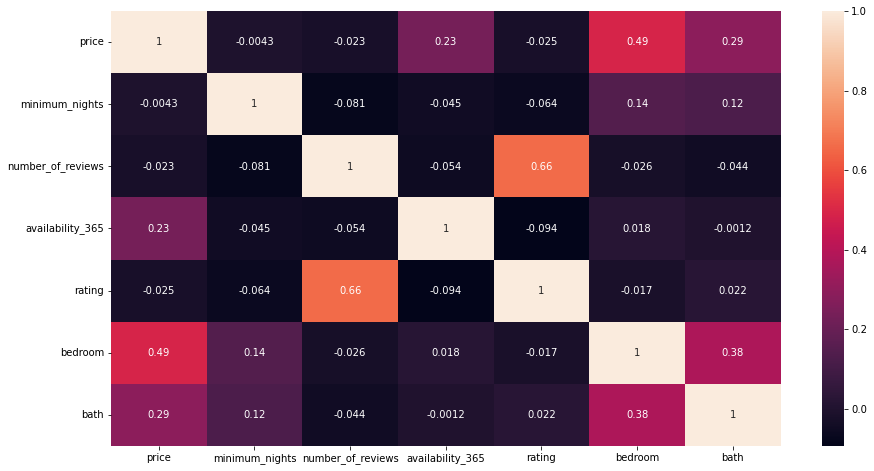

In [459]:
# create pearson correlation matrix
df_cor=df[['price','minimum_nights','number_of_reviews','availability_365','rating','bedroom','bath']]
plt.figure(figsize=(15,8))
sb.heatmap(df_cor.corr(method="pearson"), annot=True, annot_kws={"size":10})
plt.show()

In [460]:
df.describe().applymap("{0:.2f}".format)

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bath
count,16584.00,16584.00,16584.00,16584.00,16584.00,16584.00,16584.00,16584.00,16584.00
mean,0.00,0.00,0.00,0.37,0.49,0.50,0.00,-0.00,-0.00
std,1.00,1.00,1.00,0.48,0.50,0.50,1.00,1.00,1.00
min,-3.36,-3.31,-1.44,0.00,0.00,0.00,-1.51,-1.76,-1.13
25%,-0.73,-0.57,-0.62,0.00,0.00,0.00,-1.51,-0.67,-0.23
50%,0.07,-0.11,-0.29,0.00,0.00,0.00,0.64,-0.67,-0.23
75%,0.79,0.70,0.36,1.00,1.00,1.00,0.73,0.42,-0.23
max,2.72,2.60,6.04,1.00,1.00,1.00,0.76,14.57,3.41


In [461]:
# perform binary one-out-of-k encoding on the 'room_type'
df = pd.get_dummies(df, columns=['room_type'], dtype=int)
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bath,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,-0.505753,-0.073010,0.366287,1,1,1,0.703314,-0.671917,-0.225267,1,0,0,0
1,0.709866,-0.370576,-0.632451,1,1,0,0.716943,-0.671917,-0.225267,1,0,0,0
2,-0.346037,-0.095505,-0.292420,0,1,0,0.567026,0.416805,-1.134891,0,0,1,0
3,0.319970,-0.365434,-0.616024,0,1,0,0.657885,-0.671917,-0.225267,1,0,0,0
4,-0.388315,-0.373147,2.007304,0,1,1,0.703314,0.416805,3.413230,1,0,0,0


In [462]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,rating,bedroom,bath,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,-0.505753,-0.073010,0.366287,1,1,1,0.703314,-0.671917,-0.225267,1,0,0,0
1,0.709866,-0.370576,-0.632451,1,1,0,0.716943,-0.671917,-0.225267,1,0,0,0
2,-0.346037,-0.095505,-0.292420,0,1,0,0.567026,0.416805,-1.134891,0,0,1,0
3,0.319970,-0.365434,-0.616024,0,1,0,0.657885,-0.671917,-0.225267,1,0,0,0
4,-0.388315,-0.373147,2.007304,0,1,1,0.703314,0.416805,3.413230,1,0,0,0


In [463]:
m = df.to_numpy()
attributeNames = df.columns.to_list()
mc = m - m.mean(axis=0)
M = mc
M.shape

(16584, 13)

In [464]:
# PCA by computing SVD of M
U,S,V = svd(M,full_matrices=False)
V = V.T  
X,Y = M.shape

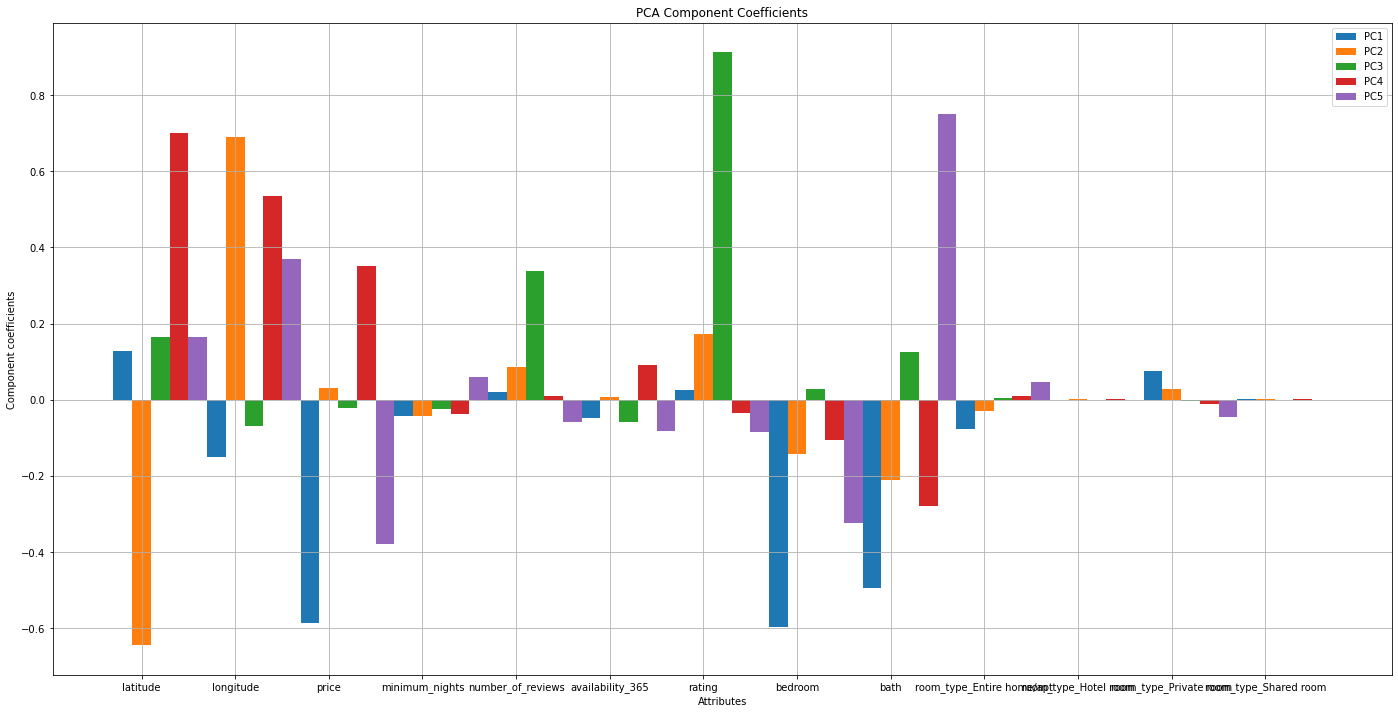

In [465]:
# coefficients:
pcs = [0,1,2,3,4]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,Y+1)
plt.figure(figsize=(24, 12))
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('PCA Component Coefficients')
plt.show()

In [466]:
# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

In [467]:
threshold = 0.8

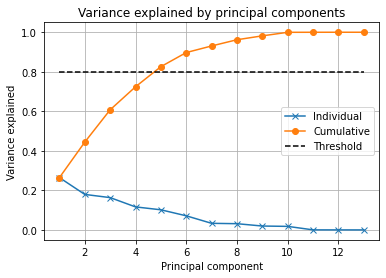

In [468]:
# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

In [469]:
# Project the centered data onto principal component space
Z = M @ V

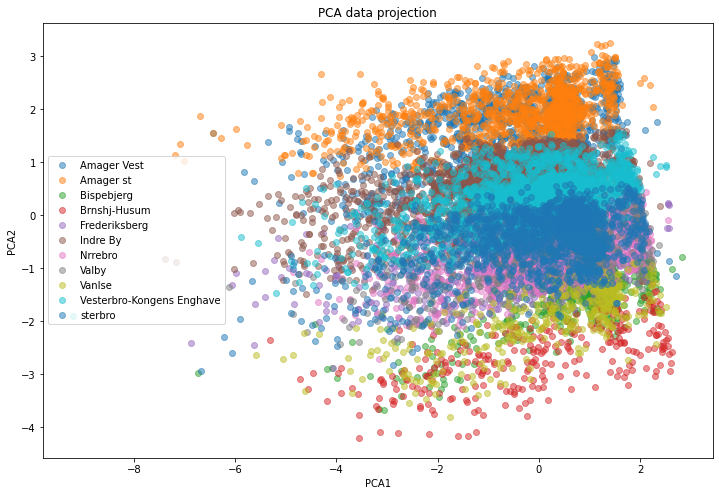

In [470]:
# Plot PCA of the data for neighbourhood
f = plt.figure(figsize=(12, 8))
plt.title('PCA data projection')
i=0
j=1
C = len(classNames)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
plt.legend(classNames)
plt.xlabel('PCA{0}'.format(i+1))
plt.ylabel('PCA{0}'.format(j+1))

# Output result to screen
plt.show()

In [471]:
pca = PCA(n_components=5)
pca.fit(M)

loadings = pca.components_[:5]

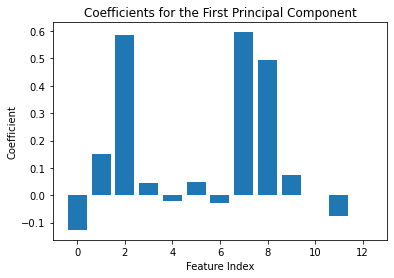

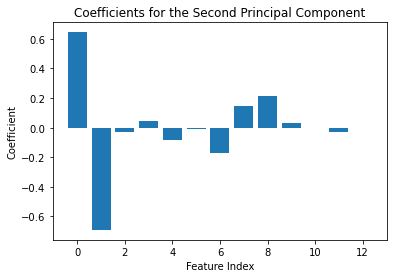

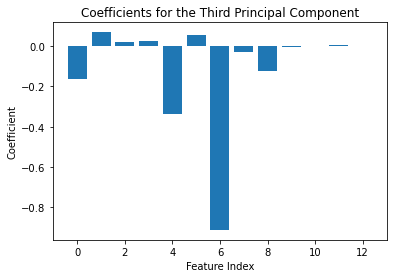

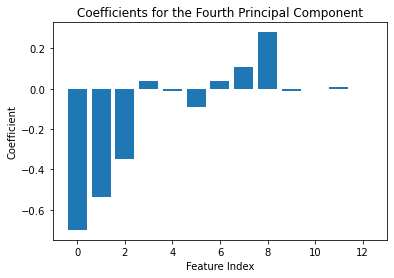

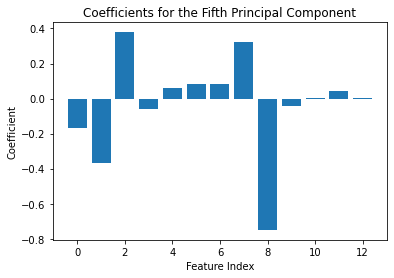

In [472]:
# create bar plots to visualize the coefficient of each component
plt.bar(range(len(loadings[0])), loadings[0])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Coefficients for the First Principal Component')
plt.show()

plt.bar(range(len(loadings[1])), loadings[1])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Coefficients for the Second Principal Component')
plt.show()

plt.bar(range(len(loadings[2])), loadings[2])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Coefficients for the Third Principal Component')
plt.show()

plt.bar(range(len(loadings[3])), loadings[3])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Coefficients for the Fourth Principal Component')
plt.show()

plt.bar(range(len(loadings[4])), loadings[4])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Coefficients for the Fifth Principal Component')
plt.show()